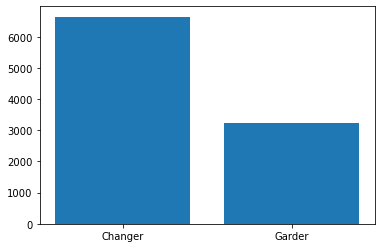

In [71]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

class Strats(Enum):
    GARDER=1
    CHANGER=0
    
seed()

'''La fonction si dessus simule une partie du jeu de Monty Hall

    Pour ce faire elle reçoit en paramètre un objet strat définissant le comportement du joueur
    

'''
    
def jeuMontyHall(strat):
    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strat == Strats.CHANGER:
        deuxieme_choix = portes[0]
    elif strat == Strats.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte

def bouclage(nb,strat):
    result=[]
    for i in range(nb):
        if jeuMontyHall(strat):
            result.append(1)
        else:
            result.append(0)
    return result



#print(sum(1 if jeuMontyHall(Strats.CHANGER) else 0 for i in range(100000))) #list en compréhension 
#plot = plt.scatter(range(10), bouclage(10, Strats.CHANGER)) #necessite une liste

'''def play(strat, nb_tours):

    return [1 if jeuMontyHall(strat) else 0 for i in range(nb_tours)]

plot = plt.plot(play(Strats.GARDER, 10))'''

plot = plt.bar([1,2],[sum(bouclage(10000, Strats.CHANGER)), 
               sum(bouclage(10000, Strats.GARDER))], 
        tick_label=["Changer","Garder"])